In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [2]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('Fake.csv')

In [4]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot: xlabel='subject', ylabel='count'>

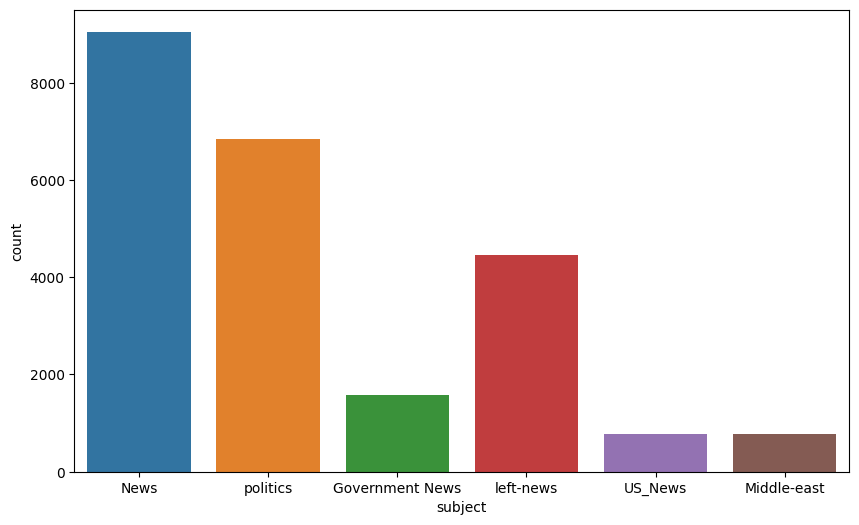

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

In [8]:
text= ' ' .join(fake['text'].tolist()) ## joined all text data with space


In [9]:
' '.join(['this' , 'is', 'a', 'data']) ## eg how text data is joined with space

'this is a data'

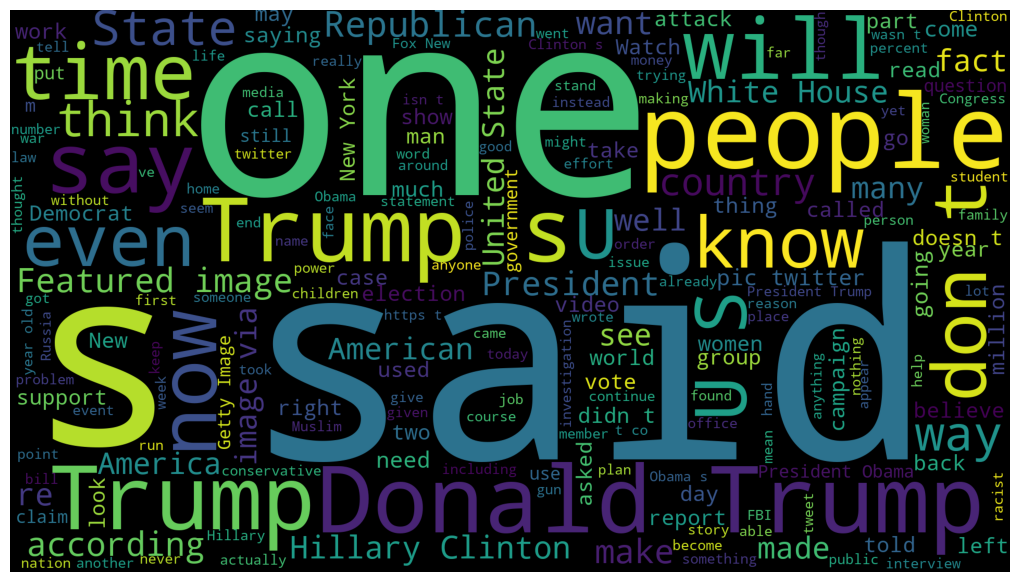

In [10]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Real News Analysis

In [13]:
real= pd.read_csv('True.csv')

In [14]:
text = ' '.join(real['text'].tolist())

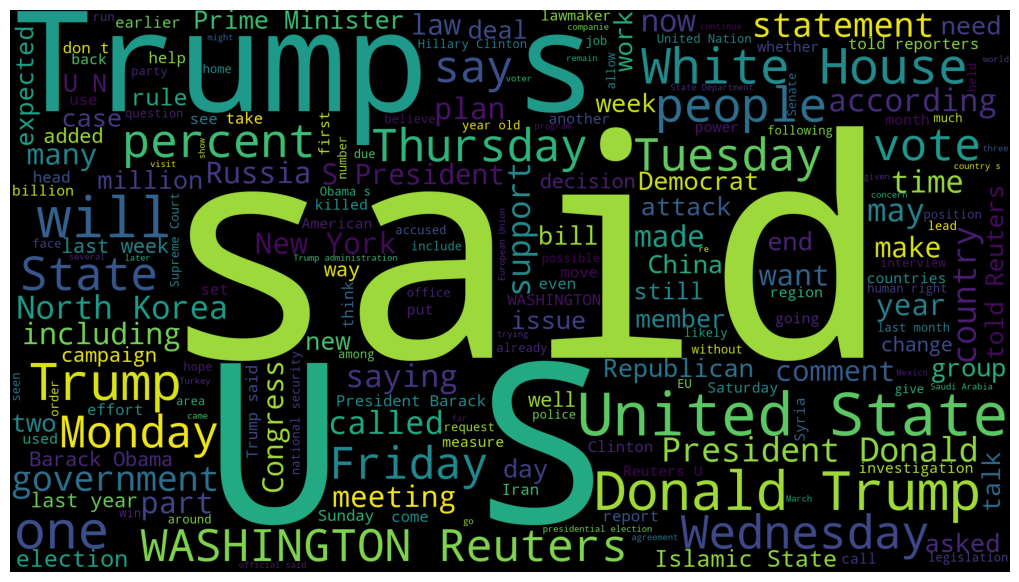

In [15]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
real.sample(5)

title  \
10571  Factbox: Build a giant wall, cut Education Dep...   
11962  Lebanon detains Uber driver suspected of murde...   
16629  Suicide risk torture victim can be deported: E...   
14421  Zimbabwe opposition leader 'baffled' by Mugabe...   
15354  In Abu Dhabi, France's Macron says must remain...   

                                                    text       subject  \
10571  WASHINGTON (Reuters) - Republican presidential...  politicsNews   
11962  BEIRUT (Reuters) - A Lebanese taxi driver with...     worldnews   
16629  LUXEMBOURG (Reuters) - European governments ca...     worldnews   
14421  HARARE (Reuters) - Zimbabwe opposition leader ...     worldnews   
15354  ABU DHABI (Reuters) - French President Emmanue...     worldnews   

                     date  
10571      March 2, 2016   
11962  December 18, 2017   
16629   October 24, 2017   
14421  November 19, 2017   
15354   November 8, 2017

In [17]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split(' - ', maxsplit= 1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [18]:
len(unknown_publishers)

229

In [19]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [20]:
real.iloc[8]

title             Trump on Twitter (Dec 28) - Global Warming
text       The following statements were posted to the ve...
subject                                         politicsNews
date                                      December 29, 2017 
Name: 8, dtype: object

In [22]:
publisher = []
tmp_text = []
for index , row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('unknown')
  else:
    record = row.split(' - ', maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [23]:
real['publisher']= publisher
real['text']= tmp_text


In [24]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [25]:
real.shape

(21417, 5)

In [26]:
empty_fake_index = [index for index, text in enumerate (fake.text.tolist()) if str(text).strip()==""]

In [27]:
fake.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [28]:
real['text'] = real['title'] + " " + real['text']
fake['text'] =  fake['title']+" " + fake['text']

In [29]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

#### Preprocessing Text

In [30]:
real['class']=1
fake['class']=0

In [31]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [32]:
real=real[['text','class']]

In [33]:
fake= fake[['text', 'class']]

In [34]:
data=real.append(fake,ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15220\1598362680.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake,ignore_index=True)


In [35]:
data.sample(5)

text  class
25537   this man just exposed a sorry truth about a v...      0
38802  iranian navy fires warning shots on and seizes...      0
9017   house democrats broadcast 'sit-in' on social m...      1
17389  bombs kill pakistani soldiers hunting u.s.-can...      1
30596  bizarre 2006 film starring former white house ...      0

In [39]:
import preprocess_kgptalkie as ps

In [40]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [41]:
ps.remove_special_chars('this , . @ # is gre@t' )

'this is gret'

In [43]:
import gensim


In [44]:
y = data['class'].values

In [45]:
X=[d.split() for d in data['text'].tolist()]

In [50]:
type(X[0])

list

In [53]:

DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [62]:
len(w2v_model.wv.key_to_index)

231902

In [63]:
w2v_model.wv.key_to_index

{'the': 0,
 'to': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 'that': 6,
 'on': 7,
 'for': 8,
 's': 9,
 'is': 10,
 'he': 11,
 'said': 12,
 'trump': 13,
 'it': 14,
 'with': 15,
 'was': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'has': 20,
 'be': 21,
 'have': 22,
 'not': 23,
 'from': 24,
 'this': 25,
 'at': 26,
 'are': 27,
 'who': 28,
 'us': 29,
 'an': 30,
 'they': 31,
 'i': 32,
 'but': 33,
 'we': 34,
 'would': 35,
 'president': 36,
 'about': 37,
 'will': 38,
 'their': 39,
 'had': 40,
 'you': 41,
 't': 42,
 'been': 43,
 'were': 44,
 'people': 45,
 'more': 46,
 'or': 47,
 'after': 48,
 'which': 49,
 'she': 50,
 'her': 51,
 'one': 52,
 'if': 53,
 'its': 54,
 'out': 55,
 'all': 56,
 'what': 57,
 'state': 58,
 'when': 59,
 'new': 60,
 'also': 61,
 'up': 62,
 'there': 63,
 'over': 64,
 'no': 65,
 'house': 66,
 'donald': 67,
 'our': 68,
 'states': 69,
 'clinton': 70,
 'obama': 71,
 'government': 72,
 'can': 73,
 'just': 74,
 'him': 75,
 'so': 76,
 'than': 77,
 'republican': 78,
 'other': 79,
 'som

In [65]:
w2v_model.wv['love']

array([ 2.378954  ,  2.9933305 ,  0.43844432, -0.78170985, -1.1192182 ,
        0.9913569 ,  1.0166028 ,  2.720919  ,  1.3638967 ,  2.3021688 ,
       -1.8954066 , -1.7196766 , -2.9321501 ,  0.5551719 , -0.85947657,
       -0.225963  , -0.00975016,  1.6762338 ,  2.2388802 , -1.3474733 ,
       -0.24459882,  1.5624201 , -0.01792627,  3.3671427 ,  0.12734565,
        4.2583213 ,  1.03486   , -1.3894747 , -2.8428278 , -1.9853029 ,
        4.54496   , -0.1777718 ,  2.593728  ,  0.37824547, -0.19380985,
        0.7199937 ,  0.9731874 ,  0.5235117 , -1.1700404 , -4.188174  ,
        2.008802  , -3.194245  , -6.16584   ,  0.02697001, -0.48088175,
       -1.7327775 ,  3.7501056 , -1.3694037 ,  1.914009  , -1.3500786 ,
        0.19612706,  1.9287347 ,  0.59401035, -1.5929712 ,  0.34797275,
       -0.07096268, -3.5238276 , -0.0089025 , -4.9180117 , -3.9223874 ,
       -1.6757102 , -4.334493  , -0.0369743 , -1.9575794 ,  0.72732574,
       -2.4695292 ,  0.9371038 ,  2.61501   , -0.72000045,  0.97

In [66]:
w2v_model.wv['china']

array([-4.5020294e+00, -2.7814248e+00,  4.3797326e-01,  4.8298264e+00,
       -9.5080036e-01,  1.4029118e+00,  4.4727898e-01, -7.9645944e-01,
        6.2709689e-01,  5.9046817e+00,  2.9526093e+00,  4.4035382e+00,
        8.1554258e-01, -1.3217114e+00,  1.1451243e+00,  3.2823937e+00,
        4.5270428e-01, -2.0090389e+00, -3.6260810e+00, -3.9435744e-01,
        2.1669753e+00,  3.4463713e+00,  8.6840874e-01, -2.6423054e+00,
        1.6071742e+00,  8.1615642e-02, -1.4690632e+00, -2.8123932e+00,
        2.2494864e+00, -1.0608723e+00,  3.4744341e+00, -2.9894986e+00,
        1.8202908e+00,  7.0117444e-01, -1.8209748e-01,  1.2507718e+00,
       -4.4443312e+00, -6.6198111e-01,  2.4036677e+00,  4.9139801e-01,
       -4.5618004e-01, -1.4595400e+00,  3.5632896e+00, -2.9032300e+00,
       -1.8861217e+00, -2.5816553e+00,  2.0146122e+00, -1.6998647e+00,
        2.9476092e+00, -2.2844280e-01, -3.7654738e+00,  1.2532071e+00,
        9.7717035e-01,  6.4801288e-01, -1.5801766e+00, -4.1156510e-01,
      

In [69]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7299149036407471),
 ('malaysia', 0.7027461528778076),
 ('australia', 0.6461882591247559),
 ('indian', 0.6414774656295776),
 ('china', 0.6290206909179688),
 ('indias', 0.6214908957481384),
 ('modi', 0.6068879961967468),
 ('norway', 0.6017478108406067),
 ('japan', 0.5967852473258972),
 ('maritime', 0.5934833884239197)]

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [71]:
X = tokenizer.texts_to_sequences(X)

In [72]:
X

[[18,
  30,
  473,
  480,
  10667,
  133,
  8088,
  40,
  1375,
  5172,
  1,
  419,
  3,
  4,
  301,
  79,
  6312,
  6,
  1,
  30,
  189,
  29,
  773,
  26,
  279,
  9,
  4,
  1107,
  2956,
  3,
  1,
  124,
  954,
  2,
  447,
  9,
  184,
  1193,
  173,
  394,
  4,
  1375,
  301,
  8,
  342,
  5,
  1110,
  473,
  7804,
  6,
  1188,
  6,
  1764,
  16,
  4,
  3407,
  7896,
  141,
  164,
  320,
  133,
  30,
  798,
  921,
  7805,
  675,
  8,
  2010,
  476,
  1,
  383,
  1761,
  4,
  559,
  589,
  8,
  168,
  691,
  50,
  408,
  28,
  17340,
  2,
  89,
  1352,
  65,
  6,
  410,
  60,
  32,
  776,
  25,
  1,
  8089,
  8,
  203,
  408,
  39,
  1438,
  350,
  2,
  929,
  4,
  168,
  473,
  6,
  4,
  480,
  304,
  2,
  22,
  1957,
  2,
  80,
  426,
  170,
  18,
  313,
  208,
  107,
  18,
  1,
  515,
  570,
  96,
  1781,
  1504,
  6,
  50,
  133,
  39,
  1072,
  2,
  377,
  349,
  3,
  189,
  37,
  68,
  14,
  5,
  19,
  133,
  182,
  4,
  379,
  473,
  959,
  6,
  169,
  691,
  110,
  196,
  62,

In [73]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [74]:
[len(x) for x in X]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

<function matplotlib.pyplot.show(close=None, block=None)>

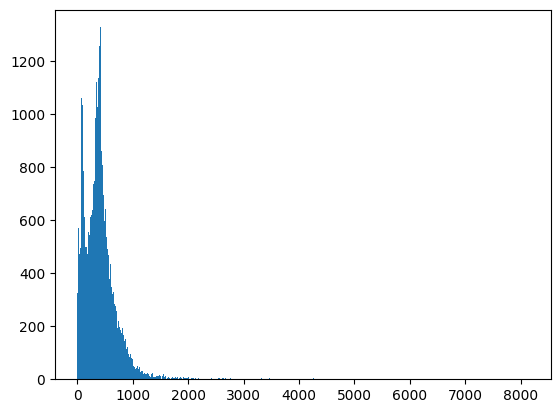

In [75]:
plt.hist([len(x) for x in X],bins=700)
plt.show

In [77]:
nos=np.array([len(x) for x in X ])
len(nos[nos>1000])

1584

In [78]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [79]:
len(X[101])

1000

In [96]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [97]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))

    for word, i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix

In [98]:
embedding_vectors=get_weight_matrix(w2v_model)

In [99]:
embedding_vectors.shape

(231903, 100)

In [101]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights = [embedding_vectors],input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23190300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,307,677
Trainable params: 117,377
Non-trainable params: 23,190,300
_________________________________________________________________


In [103]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [104]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 6)

Epoch 1/6
737/737 [==============================] - 443s 597ms/step - loss: 0.1600 - acc: 0.9409 - val_loss: 0.0842 - val_acc: 0.9718
Epoch 2/6
737/737 [==============================] - 467s 634ms/step - loss: 0.0806 - acc: 0.9742 - val_loss: 0.1327 - val_acc: 0.9486
Epoch 3/6
737/737 [==============================] - 475s 645ms/step - loss: 0.0395 - acc: 0.9874 - val_loss: 0.0470 - val_acc: 0.9810
Epoch 4/6
737/737 [==============================] - 466s 632ms/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0220 - val_acc: 0.9931
Epoch 5/6
737/737 [==============================] - 465s 632ms/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0188 - val_acc: 0.9938
Epoch 6/6
737/737 [==============================] - 456s 619ms/step - loss: 0.0080 - acc: 0.9974 - val_loss: 0.0187 - val_acc: 0.9948


In [105]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 73s 203ms/step


In [106]:
accuracy_score(y_test, y_pred)

0.9922494432071269

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5939
           1       0.99      1.00      0.99      5286

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [108]:
x= ['this is a news']

In [109]:
X_test

array([[     0,      0,      0, ...,    695,     47,  10996],
       [     0,      0,      0, ...,    197,    175,    553],
       [     0,      0,      0, ...,    269,   4046, 135488],
       ...,
       [     0,      0,      0, ...,   1628,      9,  12190],
       [     0,      0,      0, ...,  12567,     19,   4128],
       [     0,      0,      0, ...,     16,      1,    353]])

In [111]:
len(tokenizer.texts_to_matrix(x)[0])

231903

In [143]:
x= ['Donald Trump is the king of the World']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [150]:
News_Detection=(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 128ms/step


In [151]:
model.predict(x)

1/1 [==============================] - 0s 84ms/step


array([[0.01533248]], dtype=float32)

In [127]:
import pickle

In [145]:
filename= 'model.pkl'

pickle.dump(model,open(filename,'wb'))